# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

     -------------------------------------- 557.7/557.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559686 sha256=224b6095d244db51559c334be0972cea69c3cd9cf0cf850b071b3ffb8b97206d
  Stored in directory: c:\users\localman\appdata\local\pip\cache\wheels\6f\3d\38\566679c328d9821550f3564a528090c0d1325fa281c5c1ffe7
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [65]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [66]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=san francisco")

https://api.openweathermap.org/data/2.5/weather?units=metric&appid=f4c49586dd9201652008d910d8d05606&q=san francisco


In [67]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gampaha
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | simao
Processing Record 5 of Set 1 | griffith
Processing Record 6 of Set 1 | damghan
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | garmsar
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | vanderhoof
Processing Record 12 of Set 1 | konde
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | puerto rondon
Processing Record 17 of Set 1 | astana
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | bonthe
Processing Record 20 of Set 1 | watsa
Processing Record 21 of Set 1 | bahia blanca
Processing Record 22 of Set 1 | nanortalik
Processing Record 23 of S

Processing Record 42 of Set 4 | vilyuysk
Processing Record 43 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | bayir
Processing Record 48 of Set 4 | eureka
Processing Record 49 of Set 4 | saldanha
Processing Record 0 of Set 5 | kitale
Processing Record 1 of Set 5 | sobolevo
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | morondava
Processing Record 4 of Set 5 | bathsheba
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | montrose
Processing Record 7 of Set 5 | kununurra
Processing Record 8 of Set 5 | kupang
Processing Record 9 of Set 5 | mwinilunga
Processing Record 10 of Set 5 | ola
Processing Record 11 of Set 5 | svetlogorsk
Processing Record 12 of Set 5 | akhalgori
Processing Record 13 of Set 5 | almeria
Processing Record 14 o

Processing Record 29 of Set 8 | raton
Processing Record 30 of Set 8 | nueva loja
Processing Record 31 of Set 8 | sisimiut
Processing Record 32 of Set 8 | ust-kuyga
Processing Record 33 of Set 8 | ginir
Processing Record 34 of Set 8 | tahlequah
Processing Record 35 of Set 8 | lima
Processing Record 36 of Set 8 | manggar
Processing Record 37 of Set 8 | havoysund
Processing Record 38 of Set 8 | chapais
Processing Record 39 of Set 8 | kanata
Processing Record 40 of Set 8 | haines junction
Processing Record 41 of Set 8 | bolshaya chernigovka
City not found. Skipping...
Processing Record 42 of Set 8 | broken hill
Processing Record 43 of Set 8 | lolua
City not found. Skipping...
Processing Record 44 of Set 8 | katherine
Processing Record 45 of Set 8 | port-gentil
Processing Record 46 of Set 8 | grand gaube
Processing Record 47 of Set 8 | ahipara
Processing Record 48 of Set 8 | redmond
Processing Record 49 of Set 8 | borogontsy
Processing Record 0 of Set 9 | mogzon
Processing Record 1 of Set 9

Processing Record 20 of Set 12 | port hardy
Processing Record 21 of Set 12 | kavaratti
Processing Record 22 of Set 12 | vanavara
Processing Record 23 of Set 12 | ardakan
Processing Record 24 of Set 12 | poya
Processing Record 25 of Set 12 | ballina
Processing Record 26 of Set 12 | nouakchott
Processing Record 27 of Set 12 | wum
Processing Record 28 of Set 12 | muhos
Processing Record 29 of Set 12 | saiha
Processing Record 30 of Set 12 | goderich
Processing Record 31 of Set 12 | raudeberg
Processing Record 32 of Set 12 | akdepe
Processing Record 33 of Set 12 | kenai
Processing Record 34 of Set 12 | kyshtovka
Processing Record 35 of Set 12 | bhander
Processing Record 36 of Set 12 | meulaboh
Processing Record 37 of Set 12 | takoradi
Processing Record 38 of Set 12 | krasnoarmeysk
Processing Record 39 of Set 12 | abatskoye
Processing Record 40 of Set 12 | tahoua
Processing Record 41 of Set 12 | marawi
Processing Record 42 of Set 12 | krasnokamensk
Processing Record 43 of Set 12 | chapada do

In [68]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [69]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gampaha,7.0897,79.9925,23.96,94,20,1.54,LK,1676170605
1,atuona,-9.8000,-139.0333,26.06,74,8,6.34,PF,1676170605
2,carnarvon,-24.8667,113.6333,29.02,52,1,6.53,AU,1676170606
3,simao,22.7886,100.9748,20.71,25,4,1.74,CN,1676170606
4,griffith,41.5284,-87.4237,3.36,74,0,2.06,US,1676170333


In [70]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [71]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gampaha,7.0897,79.9925,23.96,94,20,1.54,LK,1676170605
1,atuona,-9.8000,-139.0333,26.06,74,8,6.34,PF,1676170605
2,carnarvon,-24.8667,113.6333,29.02,52,1,6.53,AU,1676170606
3,simao,22.7886,100.9748,20.71,25,4,1.74,CN,1676170606
4,griffith,41.5284,-87.4237,3.36,74,0,2.06,US,1676170333


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

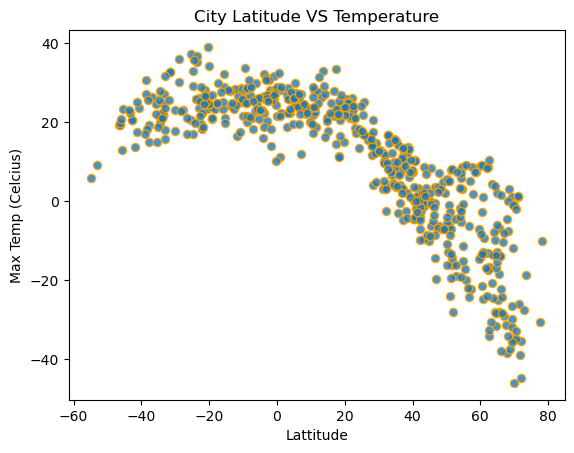

In [72]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor = "orange",
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'

)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title (f"City Latitude VS Temperature")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp (Celcius)")



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

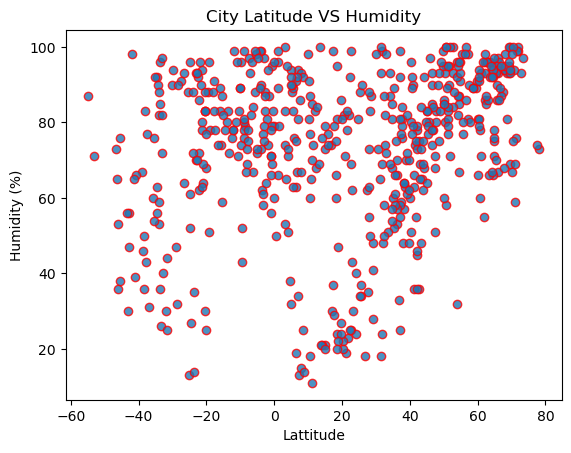

In [73]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor = "red",
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'

)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title (f"City Latitude VS Humidity")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

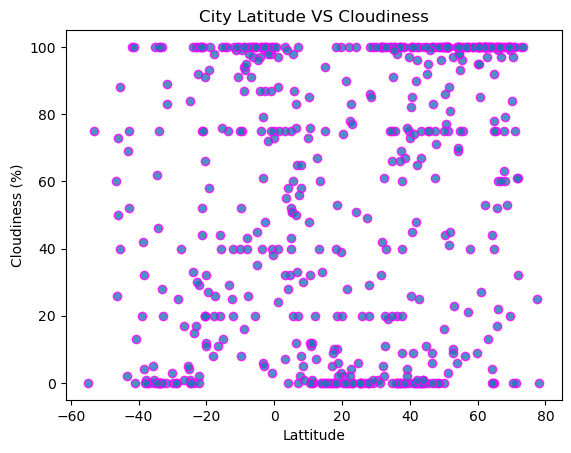

In [74]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor = "magenta",
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'

)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title (f"City Latitude VS Cloudiness")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")





# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

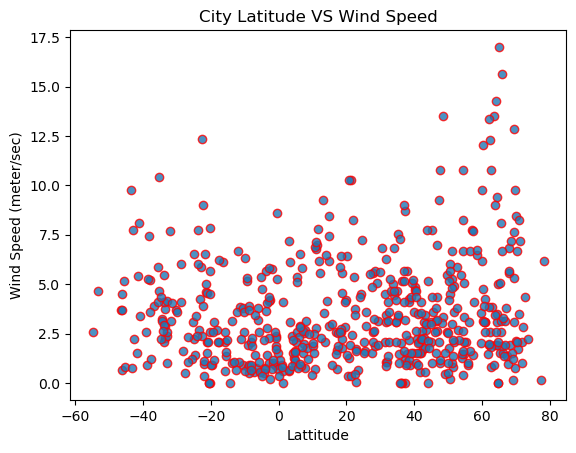

In [75]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor = "red",
    linewidths=1,
    marker='o',
    alpha=0.8,
    label='Cities'

)
# Incorporate the other graph properties
# YOUR CODE HERE


plt.title (f"City Latitude VS Wind Speed")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (meter/sec)")





# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_lin_regress(x_value, y_value, title, text_coord):
    
    #Linerar Regression computation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
    

In [77]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gampaha,7.0897,79.9925,23.96,94,20,1.54,LK,1676170605
3,simao,22.7886,100.9748,20.71,25,4,1.74,CN,1676170606
4,griffith,41.5284,-87.4237,3.36,74,0,2.06,US,1676170333
5,damghan,36.1683,54.3480,-0.63,53,98,2.01,IR,1676170607
6,albany,42.6001,-73.9662,-2.49,75,25,1.72,US,1676170414


In [78]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE


southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atuona,-9.8000,-139.0333,26.06,74,8,6.34,PF,1676170605
2,carnarvon,-24.8667,113.6333,29.02,52,1,6.53,AU,1676170606
7,ancud,-41.8697,-73.8203,13.63,98,100,1.52,CL,1676170607
11,konde,-4.9500,39.7500,26.10,72,35,4.77,TZ,1676170609
14,souillac,-20.5167,57.5167,23.21,83,20,0.00,MU,1676170610


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7368579775588461


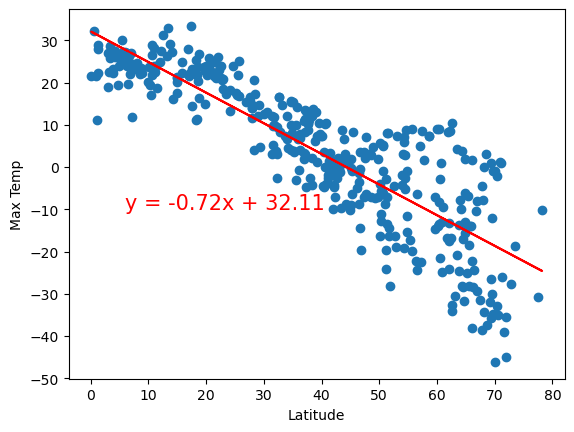

In [79]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_lin_regress(x_values, y_values, "Max Temp", (6, -10))


The r-value is 0.09211062323096383


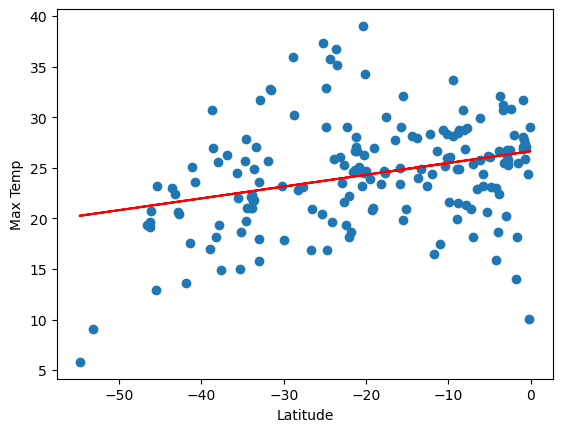

In [80]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_lin_regress(x_values, y_values, "Max Temp", (-60, 5))

**Discussion about the linear relationship:** 

Using the results of these linear regression charts, one can infer that the closer a city’s latitude is to the equator, the higher the temperature.  The regression also shows the slope proving that theory out as you move closer to the 0 degree latitude.

So cities are showing a positive relationship between latitude and temperature.  This is observed by the fact that the closer the latitude is to the equeator, the higher the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.15288024661868901


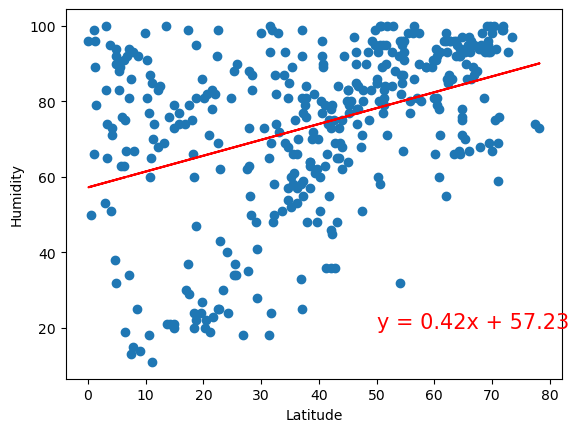

In [81]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_lin_regress(x_values, y_values, "Humidity", (50, 20))

The r-value is 0.1276879314318215


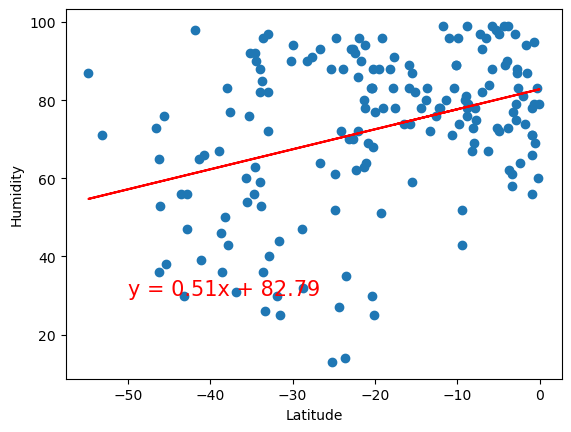

In [82]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_lin_regress(x_values, y_values, "Humidity", (-50, 30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

As you move towards the Equator:
Northern Hemisphere is showing a Negative relationship in regards to "Latitude vs Humidity".
    This is evidenced by the fact that if you are coming FROM the Northern Hemishphere, humidity tends to drop.
Southern Hemishpere is showing a Positive Relationship in regards to "Latitude vs Humidity".
    This is evidenced by the fact that if you are coming FROM the Southern Hemisphere, humidity tends to increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.11604918637793939


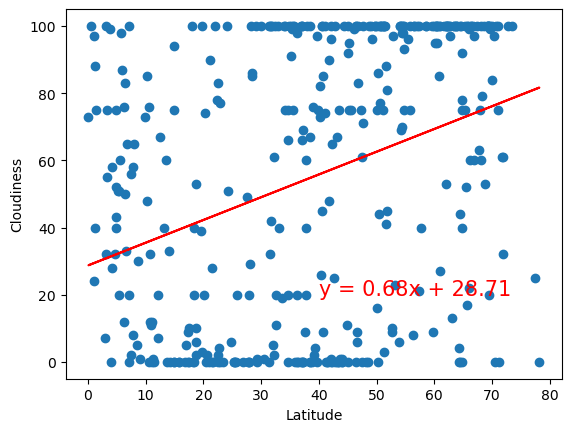

In [83]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_lin_regress(x_values, y_values, "Cloudiness", (40, 20))




The r-value is 0.16569287181803194


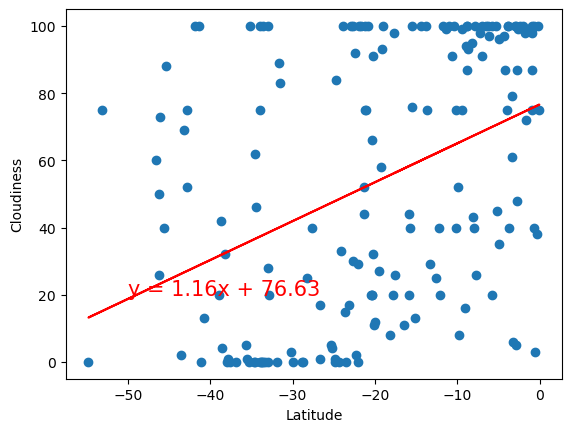

In [84]:
# Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_lin_regress(x_values, y_values, "Cloudiness", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

As you move towards the Equator:
Northern Hemisphere is showing a Negative relationship in regards to "Latitude vs Cloudiness".
    This is evidenced by the fact that if you are coming FROM the Northern Hemishphere, cloudiness tends to drop.
Southern Hemishpere is showing a Positive Relationship in regards to "Latitude vs Cloudiness".
    This is evidenced by the fact that if you are coming FROM the Southern Hemisphere, cloudiness tends to increase.



### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.03287092892959401


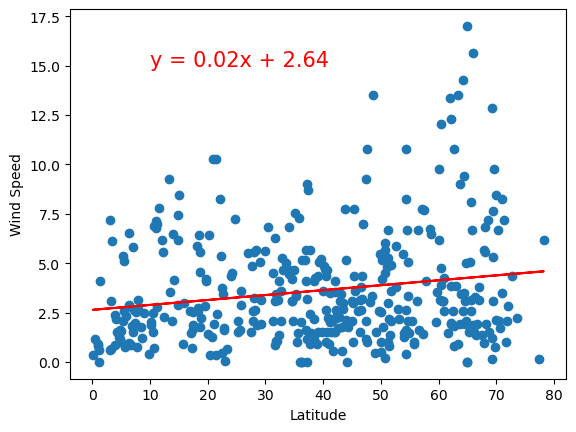

In [85]:
# Northern Hemisphere
# YOUR CODE HERE


x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_lin_regress(x_values, y_values, "Wind Speed", (10, 15))

The r-value is 0.06088945743737544


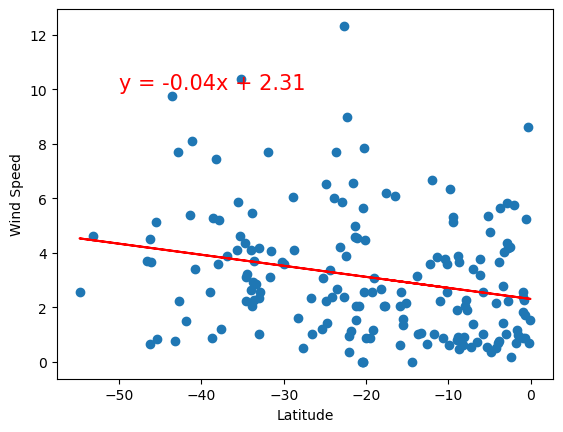

In [86]:
# Southern Hemisphere
# YOUR CODE HERE


x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_lin_regress(x_values, y_values, "Wind Speed", (-50, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

As you move towards the Equator:
Northern Hemisphere is showing a Negative relationship in regards to "Latitude vs Wind Speed".
    This is evidenced by the fact that if you are coming FROM the Northern Hemishphere, cloudiness tends to drop.
Southern Hemishpere is showing a Negative Relationship in regards to "Latitude vs Wind Speed".
    This is evidenced by the fact that if you are coming FROM the Southern Hemisphere, cloudiness tends to drop.